In [1]:
import itertools
import cv2
import otsu
import matplotlib.pyplot as plt
import numpy as np
import glob
import math
from PlotToImage import PlotToImage
from auto_tsmo import full_method
import time
import json

In [2]:
def ImShow(im, size=(14,17)):
    plt.figure(figsize = size)
    plt.imshow(im, 'gray')
    plt.show()

def HistPlot(vals, size=(14,17)):
    plt.figure(figsize = size)
    plt.plot(np.arange(len(vals)), vals)
    plt.show()

In [3]:
files = [file for file in glob.glob('C:\\Users\\admin\\Downloads\\FLIR_0\\FLIR_ADAS_1_3\\val\\thermal_8_bit//' + "*.jpeg")]
data = [cv2.imread(file) for i, file in enumerate(files) if i < 150]

In [66]:
def grayDensity(im, n = 1):
    new_im = im
    den = [np.sum([np.sum([new_im[j,i] for j in range(im.shape[0])]) for i in range(k, k+n)]) for k in range(0, im.shape[1], n)]
    den /= np.max(den)
    return den

def isCorrect(reg):
    den = grayDensity(reg)
    min_val = den.min()
    int_val = reg.sum() / (reg.shape[0] * reg.shape[1])
  #  print(int_val)
    if min_val < 0.5:
        if int_val > 180:
            return True
    return False

In [67]:
def sliding_window(frame, size):
    global n
    frame = cv2.resize(frame, size)
    w = 24
    h = 48
    cv2.rectangle(frame, (1, 1), (1+w, 1+h), (255,0,0), 2)
    _frame = frame.copy()
    for x in range(0,frame.shape[0],w//4):
        for y in range(0,frame.shape[1],h//4):
            if isCorrect(frame[y:y+h,x:x+w]):
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 1)
                n += 1
    ImShow(frame)
    frame = _frame.copy()

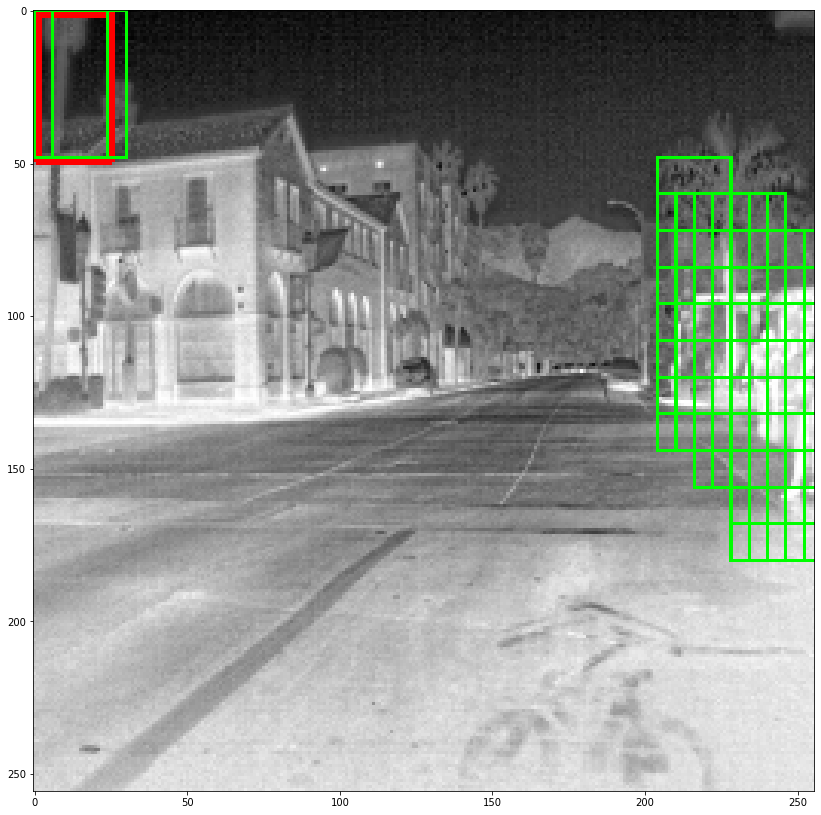

51


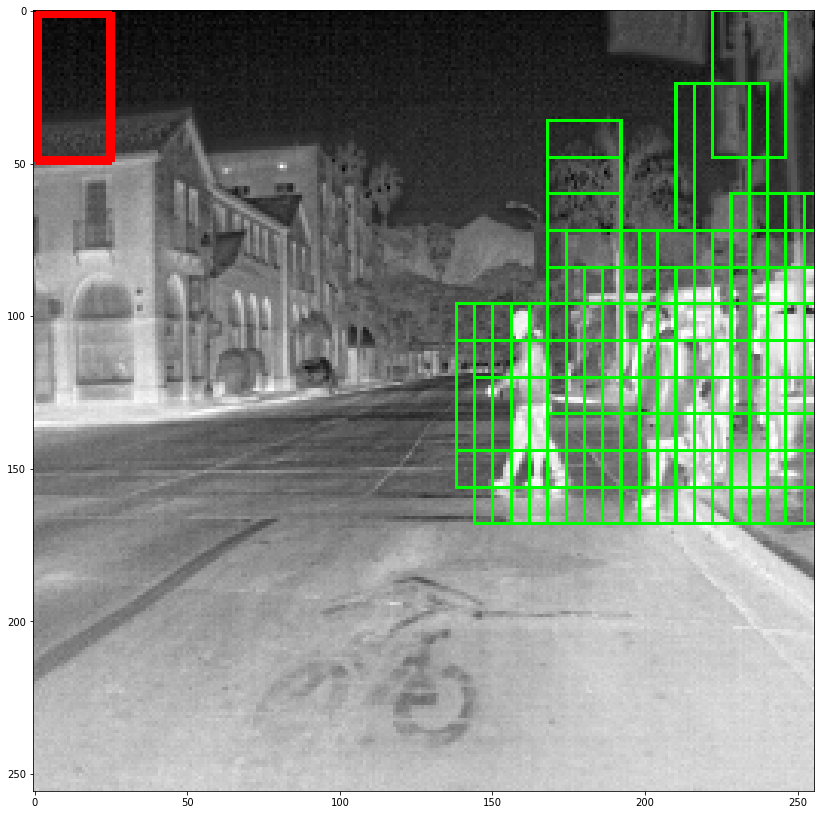

87


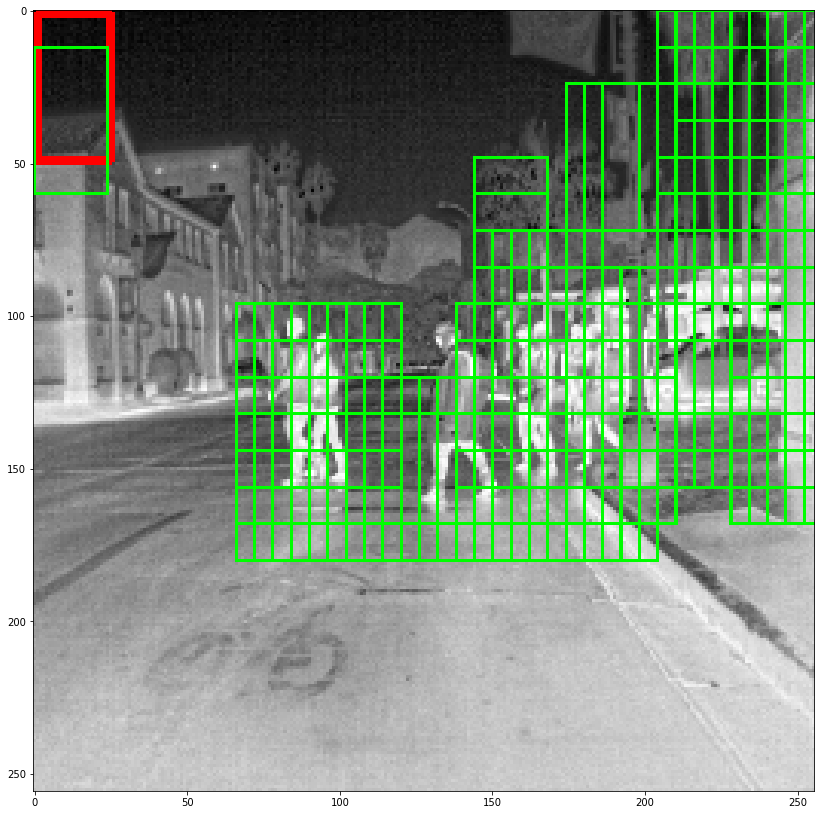

166


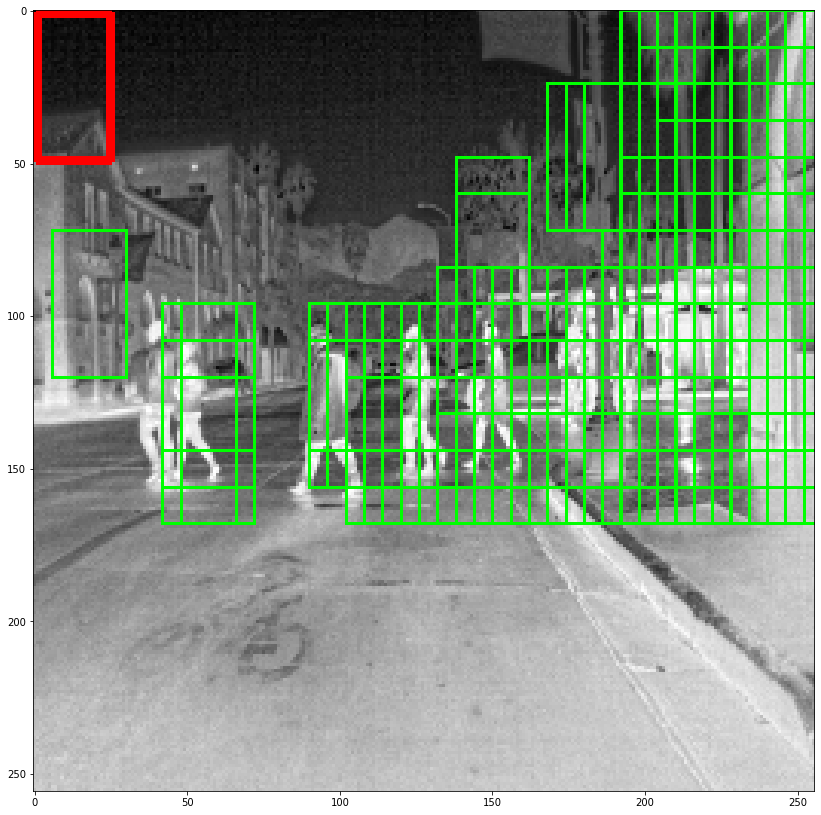

165


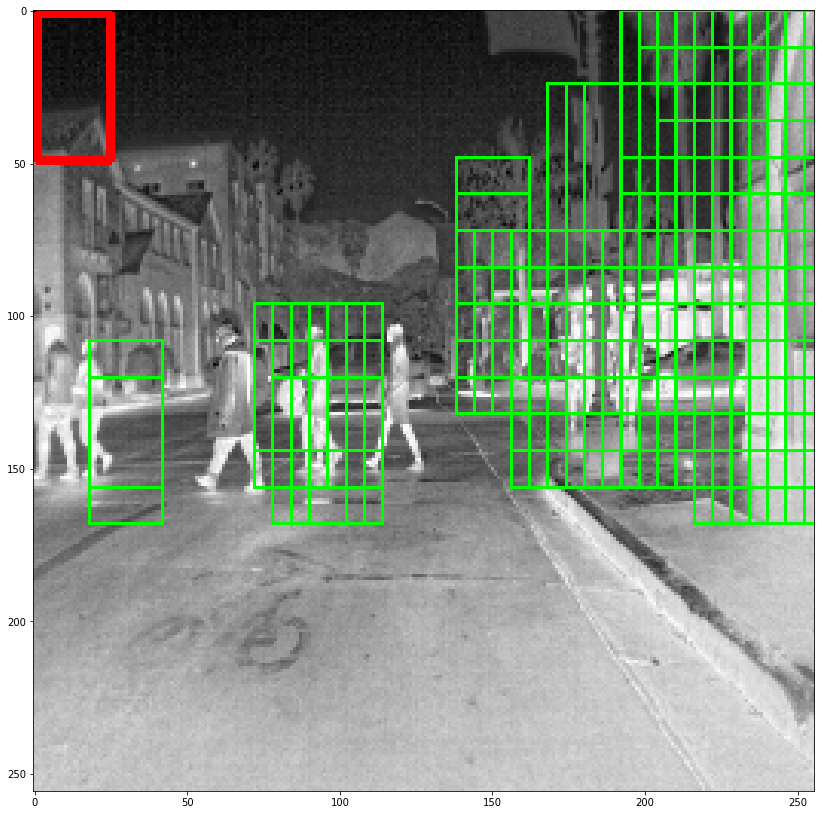

137


KeyboardInterrupt: 

In [69]:
start = 0
curr = 0
n = 0 
for d in data:
    curr += 1
    if (curr < start):
        continue
    frame = d.copy()

    im = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow("im", im)
    n = 0
    for s in range(8,9):
        sliding_window(frame.copy(), (2**s,2**s))
    print(n)
    
    cv2.imshow('frame', frame)
    
    
    if cv2.waitKey(10000) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()